# Data Analysis Interview Challenge
### Part 1: EDA - Aggregate Login Timestamps from logins.json Based on 15-Minute Time Intervals, Visualize

##### Below is my somewhat circuitous method for breaking the timestamps down into quarter hours. After finishing, I learned an easier way to do this, but the method displayed (running a for-loop to register where a timestamp fits within a range - 1st, 2nd, 3rd, or 4th quarter of an hour) technically works correctly.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
logins_df = pd.read_json('logins.json')
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [2]:
logins_df['login_time']

0       1970-01-01 20:13:18
1       1970-01-01 20:16:10
2       1970-01-01 20:16:37
3       1970-01-01 20:16:36
4       1970-01-01 20:26:21
                ...        
93137   1970-04-13 18:50:19
93138   1970-04-13 18:43:56
93139   1970-04-13 18:54:02
93140   1970-04-13 18:57:38
93141   1970-04-13 18:54:23
Name: login_time, Length: 93142, dtype: datetime64[ns]

In [3]:
from datetime import datetime
dates_list = []
for time in logins_df['login_time'][:65000]:
    if time.minute < 16:
        dates_list.append([time, '00'])
    if time.minute > 15 and time.minute < 31:
        dates_list.append([time, '15'])
    if time.minute > 30 and time.minute < 46:
        dates_list.append([time, '30'])
    if time.minute > 45 and time.minute < 60:
        dates_list.append([time, '45'])

In [4]:
for time in logins_df['login_time'][65000:-1]:
    #date = str(time.month) + ':' + str(time.day) + ':1970'
    #print(date)
    if time.minute < 16:
        dates_list.append([time, '00'])
    if time.minute > 15 and time.minute < 31:
        dates_list.append([time, '15'])
    if time.minute > 30 and time.minute < 46:
        dates_list.append([time, '30'])
    if time.minute > 45 and time.minute < 60:
        dates_list.append([time, '45'])
#print(dates_list)

In [5]:
new_df = pd.DataFrame(dates_list, columns= ['date', 'quarter_minute'])
new_df['day'] = [date.strftime("%m-%d-%Y") for date in new_df.date]
new_df['hour'] = [date.strftime("%H") for date in new_df.date]
new_df.head(80)

date quarter_minute         day hour
0  1970-01-01 20:13:18             00  01-01-1970   20
1  1970-01-01 20:16:10             15  01-01-1970   20
2  1970-01-01 20:16:37             15  01-01-1970   20
3  1970-01-01 20:16:36             15  01-01-1970   20
4  1970-01-01 20:26:21             15  01-01-1970   20
..                 ...            ...         ...  ...
75 1970-01-01 23:17:48             15  01-01-1970   23
76 1970-01-01 23:24:13             15  01-01-1970   23
77 1970-01-01 23:25:52             15  01-01-1970   23
78 1970-01-01 23:33:36             30  01-01-1970   23
79 1970-01-01 23:31:00             30  01-01-1970   23

[80 rows x 4 columns]

In [6]:
new_df['date'] = new_df['day'].astype(str) + " " + new_df['hour'].astype(str) + ":" + new_df['quarter_minute'] + ":" + "00"
new_df['date'] = pd.to_datetime(new_df['date'])
new_df

date quarter_minute         day hour
0     1970-01-01 20:00:00             00  01-01-1970   20
1     1970-01-01 20:15:00             15  01-01-1970   20
2     1970-01-01 20:15:00             15  01-01-1970   20
3     1970-01-01 20:15:00             15  01-01-1970   20
4     1970-01-01 20:15:00             15  01-01-1970   20
...                   ...            ...         ...  ...
93136 1970-04-13 18:45:00             45  04-13-1970   18
93137 1970-04-13 18:45:00             45  04-13-1970   18
93138 1970-04-13 18:30:00             30  04-13-1970   18
93139 1970-04-13 18:45:00             45  04-13-1970   18
93140 1970-04-13 18:45:00             45  04-13-1970   18

[93141 rows x 4 columns]

In [7]:
oh_df = pd.get_dummies(new_df, columns=['quarter_minute'])
oh_df

date         day hour  quarter_minute_00  \
0     1970-01-01 20:00:00  01-01-1970   20                  1   
1     1970-01-01 20:15:00  01-01-1970   20                  0   
2     1970-01-01 20:15:00  01-01-1970   20                  0   
3     1970-01-01 20:15:00  01-01-1970   20                  0   
4     1970-01-01 20:15:00  01-01-1970   20                  0   
...                   ...         ...  ...                ...   
93136 1970-04-13 18:45:00  04-13-1970   18                  0   
93137 1970-04-13 18:45:00  04-13-1970   18                  0   
93138 1970-04-13 18:30:00  04-13-1970   18                  0   
93139 1970-04-13 18:45:00  04-13-1970   18                  0   
93140 1970-04-13 18:45:00  04-13-1970   18                  0   

       quarter_minute_15  quarter_minute_30  quarter_minute_45  
0                      0                  0                  0  
1                      1                  0                  0  
2                      1                  0                  0  
3                      1                  0                  0  
4                      1                  0                  0  
...                  ...                ...                ...  
93136                  0                  0                  1  
93137                  0                  0                  1  
93138                  0                  1                  0  
93139                  0                  0                  1  
93140                  0                  0                  1  

[93141 rows x 7 columns]

In [8]:
date_df = oh_df.groupby(['date']).sum()
date_df.reset_index(inplace=True)
date_df['total_logins'] = date_df['quarter_minute_00'] + date_df['quarter_minute_15'] + date_df['quarter_minute_30'] + date_df['quarter_minute_45']
date_df

date  quarter_minute_00  quarter_minute_15  \
0    1970-01-01 20:00:00                  2                  0   
1    1970-01-01 20:15:00                  0                  6   
2    1970-01-01 20:30:00                  0                  0   
3    1970-01-01 20:45:00                  0                  0   
4    1970-01-01 21:00:00                  2                  0   
...                  ...                ...                ...   
9384 1970-04-13 17:45:00                  0                  0   
9385 1970-04-13 18:00:00                  5                  0   
9386 1970-04-13 18:15:00                  0                  2   
9387 1970-04-13 18:30:00                  0                  0   
9388 1970-04-13 18:45:00                  0                  0   

      quarter_minute_30  quarter_minute_45  total_logins  
0                     0                  0             2  
1                     0                  0             6  
2                     9                  0             9  
3                     0                  7             7  
4                     0                  0             2  
...                 ...                ...           ...  
9384                  0                  4             4  
9385                  0                  0             5  
9386                  0                  0             2  
9387                  7                  0             7  
9388                  0                  5             5  

[9389 rows x 6 columns]

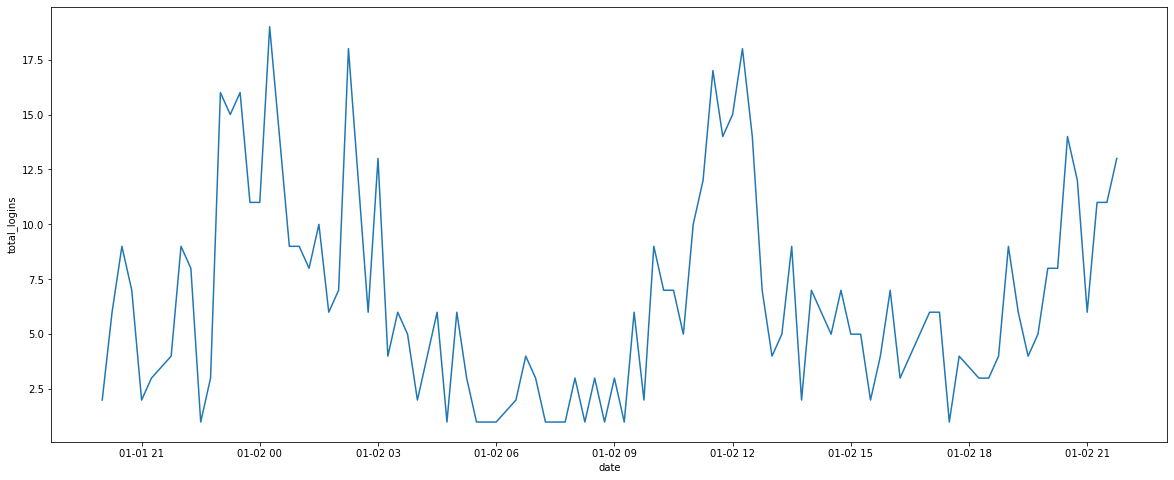

In [9]:
fig, ax = plt.subplots()
plt.xticks()
sns.lineplot(x='date', y='total_logins',
 data=date_df[0:100], ax=ax)
fig.set_size_inches(20,8)
plt.show()

##### Above, you can see how the general cycle works for a given day: around '00', or midnight, a peak happens. Then, around '12', or noon, another happens. This pattern continues in the subsequent graph, of the the next day's records. (This visual is just to show how the cycle operates on the daily level and is not the sum total of all data).

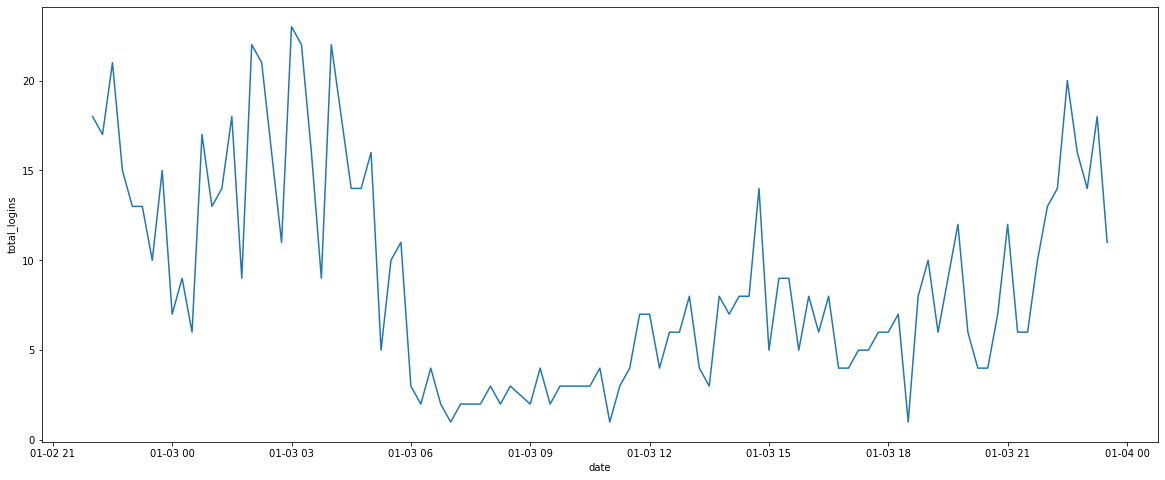

In [10]:
fig, ax = plt.subplots()
plt.xticks()
sns.lineplot(x='date', y='total_logins',
 data=date_df[100:200], ax=ax)
fig.set_size_inches(20,8)
plt.show()

##### Clearly, it's important to further manipulate this data to gain any insights from it, as daily rhythm as well as white noise play a major part in what we're seeing. As such, the time series is broken down below using decomposition, then the date column is set as the index and the data is displayed for its original, trend, seasonal, and residual (white noise) effects.

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
date_df.set_index('date', inplace=True)
date_df

quarter_minute_00  quarter_minute_15  quarter_minute_30  \
date                                                                           
1970-01-01 20:00:00                  2                  0                  0   
1970-01-01 20:15:00                  0                  6                  0   
1970-01-01 20:30:00                  0                  0                  9   
1970-01-01 20:45:00                  0                  0                  0   
1970-01-01 21:00:00                  2                  0                  0   
...                                ...                ...                ...   
1970-04-13 17:45:00                  0                  0                  0   
1970-04-13 18:00:00                  5                  0                  0   
1970-04-13 18:15:00                  0                  2                  0   
1970-04-13 18:30:00                  0                  0                  7   
1970-04-13 18:45:00                  0                  0                  0   

                     quarter_minute_45  total_logins  
date                                                  
1970-01-01 20:00:00                  0             2  
1970-01-01 20:15:00                  0             6  
1970-01-01 20:30:00                  0             9  
1970-01-01 20:45:00                  7             7  
1970-01-01 21:00:00                  0             2  
...                                ...           ...  
1970-04-13 17:45:00                  4             4  
1970-04-13 18:00:00                  0             5  
1970-04-13 18:15:00                  0             2  
1970-04-13 18:30:00                  0             7  
1970-04-13 18:45:00                  5             5  

[9389 rows x 5 columns]

<class 'pandas.core.series.Series'>


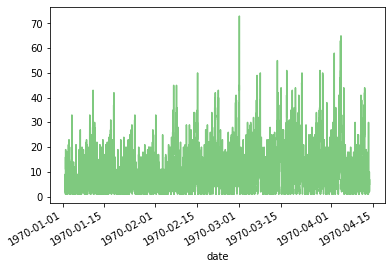

In [86]:
y = date_df['total_logins']
y.plot()
decomposition = seasonal_decompose(y, period=96) #I don't know what the period is specifying but it's necessary 
#that I set it in order to run the decomposition.
print(type(y))
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

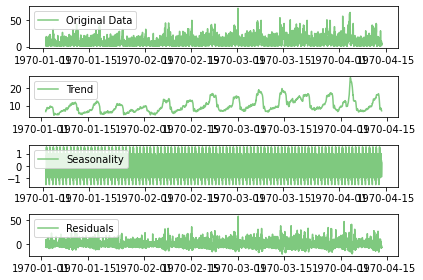

In [87]:
plt.subplot(411)
plt.plot(y, label = 'Original Data')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

<class 'pandas.core.series.Series'>


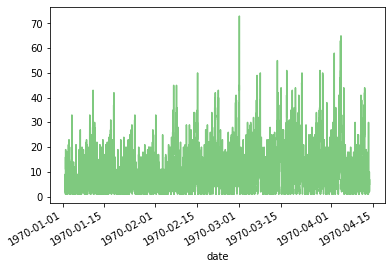

In [96]:
y = date_df['total_logins']
y.plot()
decomposition = seasonal_decompose(y, period=1) #Trying with a different period
print(type(y))
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

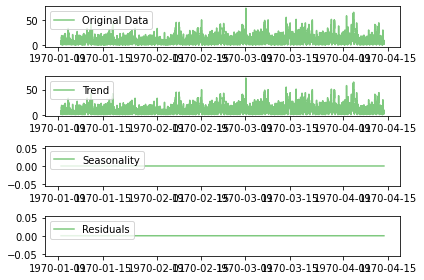

In [89]:
plt.subplot(411)
plt.plot(y, label = 'Original Data')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()
#Whoa that's weird.

<class 'pandas.core.series.Series'>


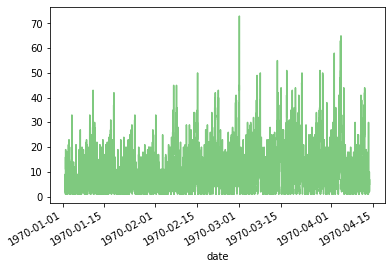

In [91]:
y = date_df['total_logins']
y.plot()
decomposition = seasonal_decompose(y, period=4694) #Now the number of entries/2 because it says I need at least 
#two cycles - i.e. won't work with just the number of entries
print(type(y))
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

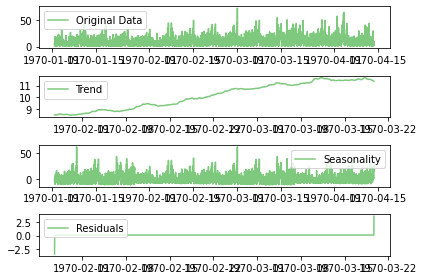

In [92]:
plt.subplot(411)
plt.plot(y, label = 'Original Data')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()
#Is that helpful? I do not know. Next, I will try to run it with no period so the error I'm getting is apparent.

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None

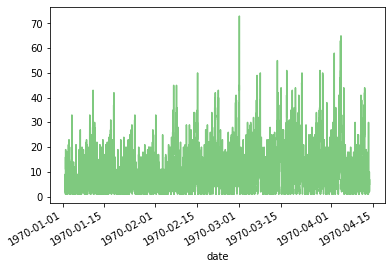

In [93]:
y = date_df['total_logins']
y.plot()
decomposition = seasonal_decompose(y)
print(type(y))
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

## Part 2: Experiment and Metrics Design
    1. What would you choose as the key measure of success in the experiment to encourage driver partners to be active in both Metropolis and Gotham?
    It seems to me the key measure of success would have to be based on a comparison of driver partner activity in either city both before and after the toll reimbursement change. It also occurs to me that the best way to measure this would be to reduce the impact of circadian rhythms by adjusting for their expected impact through decomposition of the timeseries data. Finally, though I'm not certain this was being explicitly asked, I think it would make sense (assuming Ultimate is a for-profit company and not funded for the public good) to measure how much is paid in tolls during the experiment's duration in order to compare this to the profits accrued by the new policy. Essentially: even if the different driver partners are observed operating more often in the opposite city, the change in behavior should be enough to increase revenue, meaning a comparison of the cost of the experiment versus gains from an increase in customer base should skew towards the positive.
    2. My practical experiment would need to gather data before the change in toll policy as a control, then gather the same data after the toll policy change as a comparison. The data gathered in both cases would have a category attached - probably a boolean with 1 if the toll policy had been enacted and 0 if it hadn't. I could run a hypothesis test to see if the change led to statistically significant results. I believe I should also control for expected seasonal change - by decomposing the categories. 
    If the null hypothesis is rejected, having judged that there is indeed a difference following the implementation of the policy, it would then be a matter of deciding whether the changes are worthwhile given the key measure of success. I'm guessing in this case that the key measure of success is profit, but I'm not certain. If profit is the goal, then the amount returned on average per driver per day could be fixed against the other variables to see how increased motility impacts revenues. It could be that the goal, conversely, is a certain level of access to vehicles for each city, measured in some way like the number of processed requests or the speed at which a request for a driver can be processed. Given a certain target category, the other features could be fixed against this continuous variable, which is guaged for each individual driver, in order to determine which factors lead most clearly to a beneficial change in this category. 

## Part 3: Predictive Modeling
#### Construct a predictive model to determine whether a user, in their 6th month using the service, will be "active" (i.e. took a trip within the preceding 30 days).
##### First, data wrangling and EDA is performed to get a picture of the data. I needed to determine what date should be considered "today"'s date (ultimately the last listed trip date was used to represent the day of the study). It was also necessary to determine how best to best fill NA values, which categories ultimately need to be dropped, and which should be one-hot-encoded to show up as numeric.

In [14]:
toll_df = pd.read_json('ultimate_data_challenge.json')
toll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [15]:
toll_df

city  trips_in_first_30_days signup_date  \
0      King's Landing                       4  2014-01-25   
1             Astapor                       0  2014-01-29   
2             Astapor                       3  2014-01-06   
3      King's Landing                       9  2014-01-10   
4          Winterfell                      14  2014-01-27   
...               ...                     ...         ...   
49995  King's Landing                       0  2014-01-25   
49996         Astapor                       1  2014-01-24   
49997      Winterfell                       0  2014-01-31   
49998         Astapor                       2  2014-01-14   
49999         Astapor                       0  2014-01-18   

       avg_rating_of_driver  avg_surge last_trip_date    phone  surge_pct  \
0                       4.7       1.10     2014-06-17   iPhone       15.4   
1                       5.0       1.00     2014-05-05  Android        0.0   
2                       4.3       1.00     2014-01-07   iPhone        0.0   
3                       4.6       1.14     2014-06-29   iPhone       20.0   
4                       4.4       1.19     2014-03-15  Android       11.8   
...                     ...        ...            ...      ...        ...   
49995                   5.0       1.00     2014-06-05   iPhone        0.0   
49996                   NaN       1.00     2014-01-25   iPhone        0.0   
49997                   5.0       1.00     2014-05-22  Android        0.0   
49998                   3.0       1.00     2014-01-15   iPhone        0.0   
49999                   NaN       1.00     2014-04-20  Android        0.0   

       ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  
0                     True         46.2      3.67                   5.0  
1                    False         50.0      8.26                   5.0  
2                    False        100.0      0.77                   5.0  
3                     True         80.0      2.36                   4.9  
4                    False         82.4      3.13                   4.9  
...                    ...          ...       ...                   ...  
49995                False        100.0      5.63                   4.2  
49996                False          0.0      0.00                   4.0  
49997                 True        100.0      3.86                   5.0  
49998                False        100.0      4.58                   3.5  
49999                False          0.0      3.49                   5.0  

[50000 rows x 12 columns]

In [16]:
toll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [17]:
toll_df['city'].unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [18]:
toll_df['last_trip_date'] = [pd.to_datetime(date, format='%Y-%m-%d') for date in toll_df['last_trip_date']]

In [19]:
toll_df['signup_date'] = [pd.to_datetime(date, format='%Y-%m-%d') for date in toll_df['signup_date']]

In [20]:
#Because I don't know when this dataset/trial is being performed, I'm going to guess it's
#the last date in the dataset. I obviously can't compare these to today's date because that would make all users 
#inactive users.
toll_df['active'] = toll_df['last_trip_date']
toll_df['active'] = [toll_df['last_trip_date'].max() - toll for toll in toll_df['active']]
toll_df

city  trips_in_first_30_days signup_date  \
0      King's Landing                       4  2014-01-25   
1             Astapor                       0  2014-01-29   
2             Astapor                       3  2014-01-06   
3      King's Landing                       9  2014-01-10   
4          Winterfell                      14  2014-01-27   
...               ...                     ...         ...   
49995  King's Landing                       0  2014-01-25   
49996         Astapor                       1  2014-01-24   
49997      Winterfell                       0  2014-01-31   
49998         Astapor                       2  2014-01-14   
49999         Astapor                       0  2014-01-18   

       avg_rating_of_driver  avg_surge last_trip_date    phone  surge_pct  \
0                       4.7       1.10     2014-06-17   iPhone       15.4   
1                       5.0       1.00     2014-05-05  Android        0.0   
2                       4.3       1.00     2014-01-07   iPhone        0.0   
3                       4.6       1.14     2014-06-29   iPhone       20.0   
4                       4.4       1.19     2014-03-15  Android       11.8   
...                     ...        ...            ...      ...        ...   
49995                   5.0       1.00     2014-06-05   iPhone        0.0   
49996                   NaN       1.00     2014-01-25   iPhone        0.0   
49997                   5.0       1.00     2014-05-22  Android        0.0   
49998                   3.0       1.00     2014-01-15   iPhone        0.0   
49999                   NaN       1.00     2014-04-20  Android        0.0   

       ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  \
0                     True         46.2      3.67                   5.0   
1                    False         50.0      8.26                   5.0   
2                    False        100.0      0.77                   5.0   
3                     True         80.0      2.36                   4.9   
4                    False         82.4      3.13                   4.9   
...                    ...          ...       ...                   ...   
49995                False        100.0      5.63                   4.2   
49996                False          0.0      0.00                   4.0   
49997                 True        100.0      3.86                   5.0   
49998                False        100.0      4.58                   3.5   
49999                False          0.0      3.49                   5.0   

        active  
0      14 days  
1      57 days  
2     175 days  
3       2 days  
4     108 days  
...        ...  
49995  26 days  
49996 157 days  
49997  40 days  
49998 167 days  
49999  72 days  

[50000 rows x 13 columns]

In [21]:
toll_df['active'] = [toll <= timedelta(days = 30) for toll in toll_df['active']]
toll_df

city  trips_in_first_30_days signup_date  \
0      King's Landing                       4  2014-01-25   
1             Astapor                       0  2014-01-29   
2             Astapor                       3  2014-01-06   
3      King's Landing                       9  2014-01-10   
4          Winterfell                      14  2014-01-27   
...               ...                     ...         ...   
49995  King's Landing                       0  2014-01-25   
49996         Astapor                       1  2014-01-24   
49997      Winterfell                       0  2014-01-31   
49998         Astapor                       2  2014-01-14   
49999         Astapor                       0  2014-01-18   

       avg_rating_of_driver  avg_surge last_trip_date    phone  surge_pct  \
0                       4.7       1.10     2014-06-17   iPhone       15.4   
1                       5.0       1.00     2014-05-05  Android        0.0   
2                       4.3       1.00     2014-01-07   iPhone        0.0   
3                       4.6       1.14     2014-06-29   iPhone       20.0   
4                       4.4       1.19     2014-03-15  Android       11.8   
...                     ...        ...            ...      ...        ...   
49995                   5.0       1.00     2014-06-05   iPhone        0.0   
49996                   NaN       1.00     2014-01-25   iPhone        0.0   
49997                   5.0       1.00     2014-05-22  Android        0.0   
49998                   3.0       1.00     2014-01-15   iPhone        0.0   
49999                   NaN       1.00     2014-04-20  Android        0.0   

       ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  \
0                     True         46.2      3.67                   5.0   
1                    False         50.0      8.26                   5.0   
2                    False        100.0      0.77                   5.0   
3                     True         80.0      2.36                   4.9   
4                    False         82.4      3.13                   4.9   
...                    ...          ...       ...                   ...   
49995                False        100.0      5.63                   4.2   
49996                False          0.0      0.00                   4.0   
49997                 True        100.0      3.86                   5.0   
49998                False        100.0      4.58                   3.5   
49999                False          0.0      3.49                   5.0   

       active  
0        True  
1       False  
2       False  
3        True  
4       False  
...       ...  
49995    True  
49996   False  
49997   False  
49998   False  
49999   False  

[50000 rows x 13 columns]

In [22]:
toll_df['ultimate_black_user'].describe() #For comparison with 'active'

count     50000
unique        2
top       False
freq      31146
Name: ultimate_black_user, dtype: object

## 1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained? 
#### More people are inactive than active at the date this data was collected - 18804/50000, or 37.6%.

In [23]:
toll_df['active'].describe()
#More people are inactive than active - 31196 of 50000 are inactive.
#18804/50000 are active, or 37.6%

count     50000
unique        2
top       False
freq      31196
Name: active, dtype: object

In [24]:
#Now I'll need to turn the cities and phone columns into one-hot encoded columns to preserve the categories.
#I'll also need to make my booleans numeric and fill my na's with means or medians.
toll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  active                  50000 non-null  bool  

In [25]:
toll_df['phone'].unique() #Those who don't report this might represent and category that should be preserved -

array(['iPhone', 'Android', None], dtype=object)

In [26]:
toll_df['phone'].fillna('Other', inplace=True)
toll_df['phone'].unique()

array(['iPhone', 'Android', 'Other'], dtype=object)

In [27]:
round(toll_df['avg_rating_of_driver'].mean(), 1)

4.6

In [28]:
round(toll_df['avg_rating_by_driver'].mean(), 1)

4.8

In [29]:
toll_df['avg_rating_of_driver'].fillna(round(toll_df['avg_rating_of_driver'].mean(), 1), inplace=True)
toll_df['avg_rating_by_driver'].fillna(round(toll_df['avg_rating_by_driver'].mean(), 1), inplace=True)
toll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  active                  50000 non-null  bool  

<AxesSubplot:>

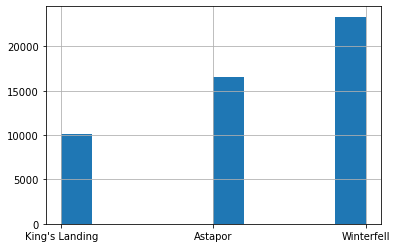

In [30]:
toll_df['city'].hist()

<AxesSubplot:>

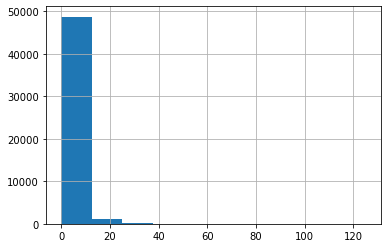

In [31]:
toll_df['trips_in_first_30_days'].hist()

<AxesSubplot:>

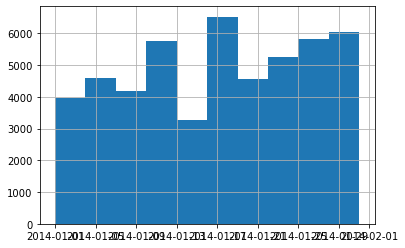

In [32]:
toll_df['signup_date'].hist()

<AxesSubplot:>

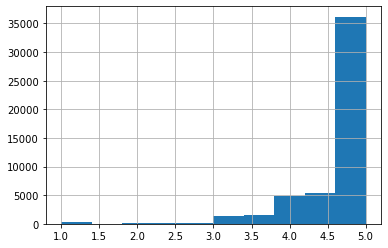

In [33]:
toll_df['avg_rating_of_driver'].hist()

<AxesSubplot:>

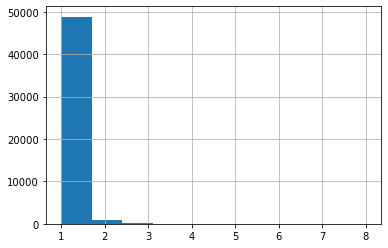

In [34]:
toll_df['avg_surge'].hist()

<AxesSubplot:>

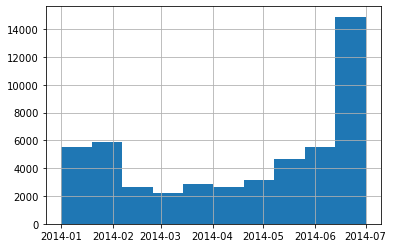

In [35]:
toll_df['last_trip_date'].hist()

<AxesSubplot:>

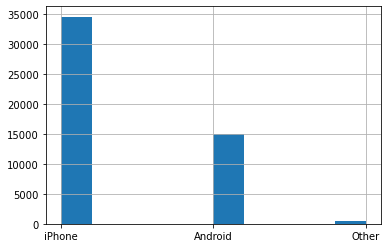

In [36]:
toll_df['phone'].hist()

<AxesSubplot:>

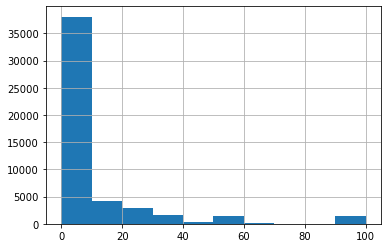

In [37]:
toll_df['surge_pct'].hist()

In [38]:
#Turning bools into ints for visualization and modeling
toll_df['ultimate_black_user'] = [int(user) for user in toll_df['ultimate_black_user']]
toll_df['active'] = [int(user) for user in toll_df['active']]
toll_df

city  trips_in_first_30_days signup_date  \
0      King's Landing                       4  2014-01-25   
1             Astapor                       0  2014-01-29   
2             Astapor                       3  2014-01-06   
3      King's Landing                       9  2014-01-10   
4          Winterfell                      14  2014-01-27   
...               ...                     ...         ...   
49995  King's Landing                       0  2014-01-25   
49996         Astapor                       1  2014-01-24   
49997      Winterfell                       0  2014-01-31   
49998         Astapor                       2  2014-01-14   
49999         Astapor                       0  2014-01-18   

       avg_rating_of_driver  avg_surge last_trip_date    phone  surge_pct  \
0                       4.7       1.10     2014-06-17   iPhone       15.4   
1                       5.0       1.00     2014-05-05  Android        0.0   
2                       4.3       1.00     2014-01-07   iPhone        0.0   
3                       4.6       1.14     2014-06-29   iPhone       20.0   
4                       4.4       1.19     2014-03-15  Android       11.8   
...                     ...        ...            ...      ...        ...   
49995                   5.0       1.00     2014-06-05   iPhone        0.0   
49996                   4.6       1.00     2014-01-25   iPhone        0.0   
49997                   5.0       1.00     2014-05-22  Android        0.0   
49998                   3.0       1.00     2014-01-15   iPhone        0.0   
49999                   4.6       1.00     2014-04-20  Android        0.0   

       ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  \
0                        1         46.2      3.67                   5.0   
1                        0         50.0      8.26                   5.0   
2                        0        100.0      0.77                   5.0   
3                        1         80.0      2.36                   4.9   
4                        0         82.4      3.13                   4.9   
...                    ...          ...       ...                   ...   
49995                    0        100.0      5.63                   4.2   
49996                    0          0.0      0.00                   4.0   
49997                    1        100.0      3.86                   5.0   
49998                    0        100.0      4.58                   3.5   
49999                    0          0.0      3.49                   5.0   

       active  
0           1  
1           0  
2           0  
3           1  
4           0  
...       ...  
49995       1  
49996       0  
49997       0  
49998       0  
49999       0  

[50000 rows x 13 columns]

<AxesSubplot:>

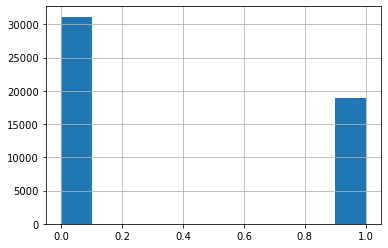

In [39]:
toll_df['ultimate_black_user'].hist()

<AxesSubplot:>

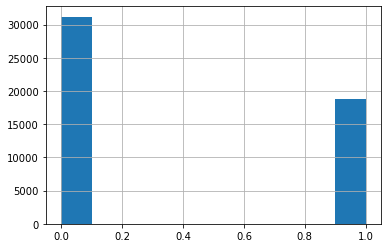

In [40]:
toll_df['active'].hist() #These are almost identical - I can visually see some active users who are not ultimate
#black members, however, so I do think the information isn't actually identical, just evens out.

### I was interested in the breakdown between ultimate black users and active users, so I displayed a stacked histogram to show how active users break down within the ultimate black user category. It looks like only about half of ultimate black users are actually active. This is likely why it doesn't show up as a major category in determining whether a user remains active into their 6th month.

<AxesSubplot:xlabel='ultimate_black_user', ylabel='Count'>

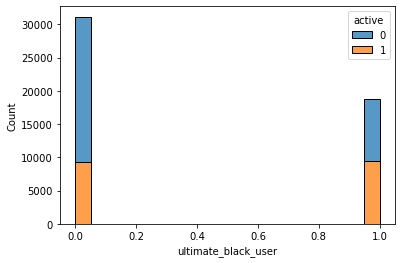

In [41]:
sns.histplot(data=toll_df, x="ultimate_black_user", hue="active", multiple='stack')
#So, of non-ultimate black users, some are active though most are not. Of ultimate black users,  it looks like about
#half are active. It will be a strong but by no means perfect indicator of whether a user is active.

<AxesSubplot:>

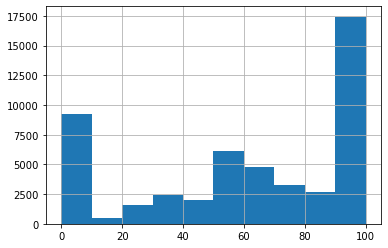

In [42]:
toll_df['weekday_pct'].hist()

<AxesSubplot:>

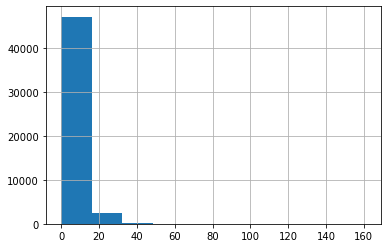

In [43]:
toll_df['avg_dist'].hist()

<AxesSubplot:>

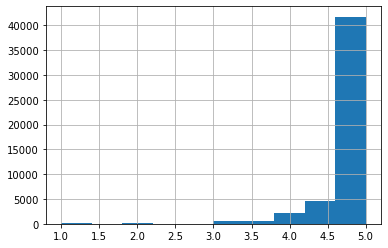

In [44]:
toll_df['avg_rating_by_driver'].hist()

In [45]:
categorical= ['city', 'phone']
dummies_df = pd.get_dummies(toll_df, columns=categorical)
dummies_df

trips_in_first_30_days signup_date  avg_rating_of_driver  avg_surge  \
0                           4  2014-01-25                   4.7       1.10   
1                           0  2014-01-29                   5.0       1.00   
2                           3  2014-01-06                   4.3       1.00   
3                           9  2014-01-10                   4.6       1.14   
4                          14  2014-01-27                   4.4       1.19   
...                       ...         ...                   ...        ...   
49995                       0  2014-01-25                   5.0       1.00   
49996                       1  2014-01-24                   4.6       1.00   
49997                       0  2014-01-31                   5.0       1.00   
49998                       2  2014-01-14                   3.0       1.00   
49999                       0  2014-01-18                   4.6       1.00   

      last_trip_date  surge_pct  ultimate_black_user  weekday_pct  avg_dist  \
0         2014-06-17       15.4                    1         46.2      3.67   
1         2014-05-05        0.0                    0         50.0      8.26   
2         2014-01-07        0.0                    0        100.0      0.77   
3         2014-06-29       20.0                    1         80.0      2.36   
4         2014-03-15       11.8                    0         82.4      3.13   
...              ...        ...                  ...          ...       ...   
49995     2014-06-05        0.0                    0        100.0      5.63   
49996     2014-01-25        0.0                    0          0.0      0.00   
49997     2014-05-22        0.0                    1        100.0      3.86   
49998     2014-01-15        0.0                    0        100.0      4.58   
49999     2014-04-20        0.0                    0          0.0      3.49   

       avg_rating_by_driver  active  city_Astapor  city_King's Landing  \
0                       5.0       1             0                    1   
1                       5.0       0             1                    0   
2                       5.0       0             1                    0   
3                       4.9       1             0                    1   
4                       4.9       0             0                    0   
...                     ...     ...           ...                  ...   
49995                   4.2       1             0                    1   
49996                   4.0       0             1                    0   
49997                   5.0       0             0                    0   
49998                   3.5       0             1                    0   
49999                   5.0       0             1                    0   

       city_Winterfell  phone_Android  phone_Other  phone_iPhone  
0                    0              0            0             1  
1                    0              1            0             0  
2                    0              0            0             1  
3                    0              0            0             1  
4                    1              1            0             0  
...                ...            ...          ...           ...  
49995                0              0            0             1  
49996                0              0            0             1  
49997                1              1            0             0  
49998                0              0            0             1  
49999                0              1            0             0  

[50000 rows x 17 columns]

In [46]:
#So now we have all categories (except for the dates) as numeric. It remains to add another feature based on whether
#the user will be active six months after their start date, which requires a new category.
dummies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trips_in_first_30_days  50000 non-null  int64         
 1   signup_date             50000 non-null  datetime64[ns]
 2   avg_rating_of_driver    50000 non-null  float64       
 3   avg_surge               50000 non-null  float64       
 4   last_trip_date          50000 non-null  datetime64[ns]
 5   surge_pct               50000 non-null  float64       
 6   ultimate_black_user     50000 non-null  int64         
 7   weekday_pct             50000 non-null  float64       
 8   avg_dist                50000 non-null  float64       
 9   avg_rating_by_driver    50000 non-null  float64       
 10  active                  50000 non-null  int64         
 11  city_Astapor            50000 non-null  uint8         
 12  city_King's Landing     50000 non-null  uint8 

In [47]:
import numpy as np
today = toll_df['last_trip_date'].max()
dummies_df['days_as_user'] = [int((today - date) / np.timedelta64(1, 'D')) for date in dummies_df['signup_date']]
dummies_df

trips_in_first_30_days signup_date  avg_rating_of_driver  avg_surge  \
0                           4  2014-01-25                   4.7       1.10   
1                           0  2014-01-29                   5.0       1.00   
2                           3  2014-01-06                   4.3       1.00   
3                           9  2014-01-10                   4.6       1.14   
4                          14  2014-01-27                   4.4       1.19   
...                       ...         ...                   ...        ...   
49995                       0  2014-01-25                   5.0       1.00   
49996                       1  2014-01-24                   4.6       1.00   
49997                       0  2014-01-31                   5.0       1.00   
49998                       2  2014-01-14                   3.0       1.00   
49999                       0  2014-01-18                   4.6       1.00   

      last_trip_date  surge_pct  ultimate_black_user  weekday_pct  avg_dist  \
0         2014-06-17       15.4                    1         46.2      3.67   
1         2014-05-05        0.0                    0         50.0      8.26   
2         2014-01-07        0.0                    0        100.0      0.77   
3         2014-06-29       20.0                    1         80.0      2.36   
4         2014-03-15       11.8                    0         82.4      3.13   
...              ...        ...                  ...          ...       ...   
49995     2014-06-05        0.0                    0        100.0      5.63   
49996     2014-01-25        0.0                    0          0.0      0.00   
49997     2014-05-22        0.0                    1        100.0      3.86   
49998     2014-01-15        0.0                    0        100.0      4.58   
49999     2014-04-20        0.0                    0          0.0      3.49   

       avg_rating_by_driver  active  city_Astapor  city_King's Landing  \
0                       5.0       1             0                    1   
1                       5.0       0             1                    0   
2                       5.0       0             1                    0   
3                       4.9       1             0                    1   
4                       4.9       0             0                    0   
...                     ...     ...           ...                  ...   
49995                   4.2       1             0                    1   
49996                   4.0       0             1                    0   
49997                   5.0       0             0                    0   
49998                   3.5       0             1                    0   
49999                   5.0       0             1                    0   

       city_Winterfell  phone_Android  phone_Other  phone_iPhone  days_as_user  
0                    0              0            0             1           157  
1                    0              1            0             0           153  
2                    0              0            0             1           176  
3                    0              0            0             1           172  
4                    1              1            0             0           155  
...                ...            ...          ...           ...           ...  
49995                0              0            0             1           157  
49996                0              0            0             1           158  
49997                1              1            0             0           151  
49998                0              0            0             1           168  
49999                0              1            0             0           164  

[50000 rows x 18 columns]

In [48]:
dummies_df['months_as_user'] = [(today - date) / np.timedelta64(1, 'M') for date in dummies_df['signup_date']]
dummies_df

trips_in_first_30_days signup_date  avg_rating_of_driver  avg_surge  \
0                           4  2014-01-25                   4.7       1.10   
1                           0  2014-01-29                   5.0       1.00   
2                           3  2014-01-06                   4.3       1.00   
3                           9  2014-01-10                   4.6       1.14   
4                          14  2014-01-27                   4.4       1.19   
...                       ...         ...                   ...        ...   
49995                       0  2014-01-25                   5.0       1.00   
49996                       1  2014-01-24                   4.6       1.00   
49997                       0  2014-01-31                   5.0       1.00   
49998                       2  2014-01-14                   3.0       1.00   
49999                       0  2014-01-18                   4.6       1.00   

      last_trip_date  surge_pct  ultimate_black_user  weekday_pct  avg_dist  \
0         2014-06-17       15.4                    1         46.2      3.67   
1         2014-05-05        0.0                    0         50.0      8.26   
2         2014-01-07        0.0                    0        100.0      0.77   
3         2014-06-29       20.0                    1         80.0      2.36   
4         2014-03-15       11.8                    0         82.4      3.13   
...              ...        ...                  ...          ...       ...   
49995     2014-06-05        0.0                    0        100.0      5.63   
49996     2014-01-25        0.0                    0          0.0      0.00   
49997     2014-05-22        0.0                    1        100.0      3.86   
49998     2014-01-15        0.0                    0        100.0      4.58   
49999     2014-04-20        0.0                    0          0.0      3.49   

       avg_rating_by_driver  active  city_Astapor  city_King's Landing  \
0                       5.0       1             0                    1   
1                       5.0       0             1                    0   
2                       5.0       0             1                    0   
3                       4.9       1             0                    1   
4                       4.9       0             0                    0   
...                     ...     ...           ...                  ...   
49995                   4.2       1             0                    1   
49996                   4.0       0             1                    0   
49997                   5.0       0             0                    0   
49998                   3.5       0             1                    0   
49999                   5.0       0             1                    0   

       city_Winterfell  phone_Android  phone_Other  phone_iPhone  \
0                    0              0            0             1   
1                    0              1            0             0   
2                    0              0            0             1   
3                    0              0            0             1   
4                    1              1            0             0   
...                ...            ...          ...           ...   
49995                0              0            0             1   
49996                0              0            0             1   
49997                1              1            0             0   
49998                0              0            0             1   
49999                0              1            0             0   

       days_as_user  months_as_user  
0               157        5.158217  
1               153        5.026797  
2               176        5.782460  
3               172        5.651040  
4               155        5.092507  
...             ...             ...  
49995           157        5.158217  
49996           158        5.191072  
49997           151        4.961087  
49998           168        5.519621

In [49]:
dummies_df['months_as_user'].describe()

count    50000.000000
mean         5.436015
std          0.287619
min          4.961087
25%          5.191072
50%          5.421056
75%          5.683895
max          5.946734
Name: months_as_user, dtype: float64

In [50]:
dummies_df['days_since_last_trip'] = [int((today - last_trip) / np.timedelta64(1, 'D')) for last_trip in dummies_df['last_trip_date']]
dummies_df

trips_in_first_30_days signup_date  avg_rating_of_driver  avg_surge  \
0                           4  2014-01-25                   4.7       1.10   
1                           0  2014-01-29                   5.0       1.00   
2                           3  2014-01-06                   4.3       1.00   
3                           9  2014-01-10                   4.6       1.14   
4                          14  2014-01-27                   4.4       1.19   
...                       ...         ...                   ...        ...   
49995                       0  2014-01-25                   5.0       1.00   
49996                       1  2014-01-24                   4.6       1.00   
49997                       0  2014-01-31                   5.0       1.00   
49998                       2  2014-01-14                   3.0       1.00   
49999                       0  2014-01-18                   4.6       1.00   

      last_trip_date  surge_pct  ultimate_black_user  weekday_pct  avg_dist  \
0         2014-06-17       15.4                    1         46.2      3.67   
1         2014-05-05        0.0                    0         50.0      8.26   
2         2014-01-07        0.0                    0        100.0      0.77   
3         2014-06-29       20.0                    1         80.0      2.36   
4         2014-03-15       11.8                    0         82.4      3.13   
...              ...        ...                  ...          ...       ...   
49995     2014-06-05        0.0                    0        100.0      5.63   
49996     2014-01-25        0.0                    0          0.0      0.00   
49997     2014-05-22        0.0                    1        100.0      3.86   
49998     2014-01-15        0.0                    0        100.0      4.58   
49999     2014-04-20        0.0                    0          0.0      3.49   

       avg_rating_by_driver  active  city_Astapor  city_King's Landing  \
0                       5.0       1             0                    1   
1                       5.0       0             1                    0   
2                       5.0       0             1                    0   
3                       4.9       1             0                    1   
4                       4.9       0             0                    0   
...                     ...     ...           ...                  ...   
49995                   4.2       1             0                    1   
49996                   4.0       0             1                    0   
49997                   5.0       0             0                    0   
49998                   3.5       0             1                    0   
49999                   5.0       0             1                    0   

       city_Winterfell  phone_Android  phone_Other  phone_iPhone  \
0                    0              0            0             1   
1                    0              1            0             0   
2                    0              0            0             1   
3                    0              0            0             1   
4                    1              1            0             0   
...                ...            ...          ...           ...   
49995                0              0            0             1   
49996                0              0            0             1   
49997                1              1            0             0   
49998                0              0            0             1   
49999                0              1            0             0   

       days_as_user  months_as_user  days_since_last_trip  
0               157        5.158217                    14  
1               153        5.026797                    57  
2               176        5.782460                   175  
3               172        5.651040                     2  
4               155        5.092507                   108  
...             ...             ...                   .

In [51]:
dummies_df.drop(columns=['signup_date', 'last_trip_date'], inplace=True)
dummies_df

trips_in_first_30_days  avg_rating_of_driver  avg_surge  surge_pct  \
0                           4                   4.7       1.10       15.4   
1                           0                   5.0       1.00        0.0   
2                           3                   4.3       1.00        0.0   
3                           9                   4.6       1.14       20.0   
4                          14                   4.4       1.19       11.8   
...                       ...                   ...        ...        ...   
49995                       0                   5.0       1.00        0.0   
49996                       1                   4.6       1.00        0.0   
49997                       0                   5.0       1.00        0.0   
49998                       2                   3.0       1.00        0.0   
49999                       0                   4.6       1.00        0.0   

       ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  \
0                        1         46.2      3.67                   5.0   
1                        0         50.0      8.26                   5.0   
2                        0        100.0      0.77                   5.0   
3                        1         80.0      2.36                   4.9   
4                        0         82.4      3.13                   4.9   
...                    ...          ...       ...                   ...   
49995                    0        100.0      5.63                   4.2   
49996                    0          0.0      0.00                   4.0   
49997                    1        100.0      3.86                   5.0   
49998                    0        100.0      4.58                   3.5   
49999                    0          0.0      3.49                   5.0   

       active  city_Astapor  city_King's Landing  city_Winterfell  \
0           1             0                    1                0   
1           0             1                    0                0   
2           0             1                    0                0   
3           1             0                    1                0   
4           0             0                    0                1   
...       ...           ...                  ...              ...   
49995       1             0                    1                0   
49996       0             1                    0                0   
49997       0             0                    0                1   
49998       0             1                    0                0   
49999       0             1                    0                0   

       phone_Android  phone_Other  phone_iPhone  days_as_user  months_as_user  \
0                  0            0             1           157        5.158217   
1                  1            0             0           153        5.026797   
2                  0            0             1           176        5.782460   
3                  0            0             1           172        5.651040   
4                  1            0             0           155        5.092507   
...              ...          ...           ...           ...             ...   
49995              0            0             1           157        5.158217   
49996              0            0             1           158        5.191072   
49997              1            0             0           151        4.961087   
49998              0            0             1           168        5.519621   
49999              1            0             0           164        5.388201   

       days_since_last_trip  
0                        14  
1                        57  
2                       175  
3                         2  
4                       108  
...                     ...  
49995                    26  
49996                   157  
49997                    40  
49998                   167  
49999                    72  

[50000 rows x 18 c

In [52]:
dummies_df['sixth_month'] = [int(int(x) == 5) for x in dummies_df['months_as_user']]
dummies_df

trips_in_first_30_days  avg_rating_of_driver  avg_surge  surge_pct  \
0                           4                   4.7       1.10       15.4   
1                           0                   5.0       1.00        0.0   
2                           3                   4.3       1.00        0.0   
3                           9                   4.6       1.14       20.0   
4                          14                   4.4       1.19       11.8   
...                       ...                   ...        ...        ...   
49995                       0                   5.0       1.00        0.0   
49996                       1                   4.6       1.00        0.0   
49997                       0                   5.0       1.00        0.0   
49998                       2                   3.0       1.00        0.0   
49999                       0                   4.6       1.00        0.0   

       ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  \
0                        1         46.2      3.67                   5.0   
1                        0         50.0      8.26                   5.0   
2                        0        100.0      0.77                   5.0   
3                        1         80.0      2.36                   4.9   
4                        0         82.4      3.13                   4.9   
...                    ...          ...       ...                   ...   
49995                    0        100.0      5.63                   4.2   
49996                    0          0.0      0.00                   4.0   
49997                    1        100.0      3.86                   5.0   
49998                    0        100.0      4.58                   3.5   
49999                    0          0.0      3.49                   5.0   

       active  city_Astapor  city_King's Landing  city_Winterfell  \
0           1             0                    1                0   
1           0             1                    0                0   
2           0             1                    0                0   
3           1             0                    1                0   
4           0             0                    0                1   
...       ...           ...                  ...              ...   
49995       1             0                    1                0   
49996       0             1                    0                0   
49997       0             0                    0                1   
49998       0             1                    0                0   
49999       0             1                    0                0   

       phone_Android  phone_Other  phone_iPhone  days_as_user  months_as_user  \
0                  0            0             1           157        5.158217   
1                  1            0             0           153        5.026797   
2                  0            0             1           176        5.782460   
3                  0            0             1           172        5.651040   
4                  1            0             0           155        5.092507   
...              ...          ...           ...           ...             ...   
49995              0            0             1           157        5.158217   
49996              0            0             1           158        5.191072   
49997              1            0             0           151        4.961087   
49998              0            0             1           168        5.519621   
49999              1            0             0           164        5.388201   

       days_since_last_trip  sixth_month  
0                        14            1  
1                        57            1  
2                       175            1  
3                         2            1  
4                       108            1  
...                     ...          ...  
49995                    26            1  
49996                   157        

In [53]:
dummies_df['target'] = dummies_df['active'] + dummies_df['sixth_month']
dummies_df['target'] = [int(x == 2) for x in dummies_df['target']]
dummies_df

trips_in_first_30_days  avg_rating_of_driver  avg_surge  surge_pct  \
0                           4                   4.7       1.10       15.4   
1                           0                   5.0       1.00        0.0   
2                           3                   4.3       1.00        0.0   
3                           9                   4.6       1.14       20.0   
4                          14                   4.4       1.19       11.8   
...                       ...                   ...        ...        ...   
49995                       0                   5.0       1.00        0.0   
49996                       1                   4.6       1.00        0.0   
49997                       0                   5.0       1.00        0.0   
49998                       2                   3.0       1.00        0.0   
49999                       0                   4.6       1.00        0.0   

       ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  \
0                        1         46.2      3.67                   5.0   
1                        0         50.0      8.26                   5.0   
2                        0        100.0      0.77                   5.0   
3                        1         80.0      2.36                   4.9   
4                        0         82.4      3.13                   4.9   
...                    ...          ...       ...                   ...   
49995                    0        100.0      5.63                   4.2   
49996                    0          0.0      0.00                   4.0   
49997                    1        100.0      3.86                   5.0   
49998                    0        100.0      4.58                   3.5   
49999                    0          0.0      3.49                   5.0   

       active  city_Astapor  city_King's Landing  city_Winterfell  \
0           1             0                    1                0   
1           0             1                    0                0   
2           0             1                    0                0   
3           1             0                    1                0   
4           0             0                    0                1   
...       ...           ...                  ...              ...   
49995       1             0                    1                0   
49996       0             1                    0                0   
49997       0             0                    0                1   
49998       0             1                    0                0   
49999       0             1                    0                0   

       phone_Android  phone_Other  phone_iPhone  days_as_user  months_as_user  \
0                  0            0             1           157        5.158217   
1                  1            0             0           153        5.026797   
2                  0            0             1           176        5.782460   
3                  0            0             1           172        5.651040   
4                  1            0             0           155        5.092507   
...              ...          ...           ...           ...             ...   
49995              0            0             1           157        5.158217   
49996              0            0             1           158        5.191072   
49997              1            0             0           151        4.961087   
49998              0            0             1           168        5.519621   
49999              1            0             0           164        5.388201   

       days_since_last_trip  sixth_month  target  
0                        14            1       1  
1                        57            1       0  
2                       175            1       0  
3                         2            1       1  
4                       108            1       0  
...                     ...          ...     ...  
49995                 

In [54]:
dummies_df['target'].value_counts()
#It's important to note that most of the data is not in the "retained" category so this is not a perfectly balanced
#dataset. This will specifically be important when interpreting the metrics.

0    32471
1    17529
Name: target, dtype: int64

### I think it's important to note that (below) I dropped all the categories which I literally used to determine whether a customer is active in their 6th month, since of course those will highly correlate with whether or not a customer is active in their 6th month. This obvious correlation didn't seem like valuable data to have.

In [55]:
#NOTE: I'm dropping the categories I literally used to create the target category since these feel like cheating.
dummies_df.drop(columns=['months_as_user', 'days_since_last_trip', 'active', 'sixth_month', 'days_as_user'], inplace=True)
dummies_df 

trips_in_first_30_days  avg_rating_of_driver  avg_surge  surge_pct  \
0                           4                   4.7       1.10       15.4   
1                           0                   5.0       1.00        0.0   
2                           3                   4.3       1.00        0.0   
3                           9                   4.6       1.14       20.0   
4                          14                   4.4       1.19       11.8   
...                       ...                   ...        ...        ...   
49995                       0                   5.0       1.00        0.0   
49996                       1                   4.6       1.00        0.0   
49997                       0                   5.0       1.00        0.0   
49998                       2                   3.0       1.00        0.0   
49999                       0                   4.6       1.00        0.0   

       ultimate_black_user  weekday_pct  avg_dist  avg_rating_by_driver  \
0                        1         46.2      3.67                   5.0   
1                        0         50.0      8.26                   5.0   
2                        0        100.0      0.77                   5.0   
3                        1         80.0      2.36                   4.9   
4                        0         82.4      3.13                   4.9   
...                    ...          ...       ...                   ...   
49995                    0        100.0      5.63                   4.2   
49996                    0          0.0      0.00                   4.0   
49997                    1        100.0      3.86                   5.0   
49998                    0        100.0      4.58                   3.5   
49999                    0          0.0      3.49                   5.0   

       city_Astapor  city_King's Landing  city_Winterfell  phone_Android  \
0                 0                    1                0              0   
1                 1                    0                0              1   
2                 1                    0                0              0   
3                 0                    1                0              0   
4                 0                    0                1              1   
...             ...                  ...              ...            ...   
49995             0                    1                0              0   
49996             1                    0                0              0   
49997             0                    0                1              1   
49998             1                    0                0              0   
49999             1                    0                0              1   

       phone_Other  phone_iPhone  target  
0                0             1       1  
1                0             0       0  
2                0             1       0  
3                0             1       1  
4                0             0       0  
...            ...           ...     ...  
49995            0             1       1  
49996            0             1       0  
49997            0             0       0  
49998            0             1       0  
49999            0             0       0  

[50000 rows x 15 columns]

## 2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
#### I built a couple of different models to run my data through and was unable to find very high degrees of accuracy. I suspect dropping the columns I did lowered the overall performance, but I felt it wasn't very predictive to effectively leave columns that contain the precise information the model is trying to predict. I do think perhaps if I were to run these models again I would consider ways to create new columns/features in order to improve performance.
#### I think it's also worth noting that the dataset is not balanced and there are fewer positively-identified users ('active'/'retained') than negatively-identified. This effects how the performanced metrics should be read, and specifically I would put more emphasis on balanced accuracy and precision than accuracy and recall, which can be skewed by an imbalanced dataset.
#### Below, I have a Random Forest Model that uses a grid search to find the optimal number of estimators. This model also returns a list of feature importances, ranked. There is also a PCA visualization, which doesn't lend much insight but helps to at least visualize the difficulty my models appear to be facing. Then, there is a Gradient Boosting Classifier and a Light Gradient Boosting model, which uses Bayesian Optimization to determine the best parameters.

In [56]:
import numpy as np
import os
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.cluster
import numpy as np
import sklearn.metrics
import matplotlib.cm as cm
import sklearn.decomposition
import matplotlib.colors
from IPython.display import Image

data_columns = dummies_df.columns
X = dummies_df.drop(['target'],axis =1)
X_index = X.index
X_cols = X.columns
y = dummies_df['target']
y_col = 'target'
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [57]:
#Random Forest Model:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score, f1_score, accuracy_score,log_loss, auc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {'n_estimators':np.arange(1,50)}
rfc = RandomForestClassifier()
rfc_cv= GridSearchCV(rfc,param_grid,cv=5)
rfc_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [58]:
print("Best Score:" + str(rfc_cv.best_score_))
print("Best Parameters: " + str(rfc_cv.best_params_))

Best Score:0.74955
Best Parameters: {'n_estimators': 36}


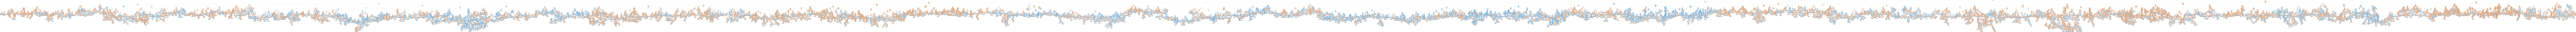

In [84]:
#Below, the Random Forest Classifier is run again with the optimal parameter found above - for visualization purposes
model = RandomForestClassifier(n_estimators=36)

# Train
model.fit(X_train_scaled, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_cols,
                class_names = y_col,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook - this is imported at the top
Image(filename = 'tree.png')

Random Forest: Accuracy=0.745
Further Random Forest Metrics:
Balanced accuracy: 0.7154590396282894
Precision score: 0.6533054142985343
Recall score: 0.6112510495382032


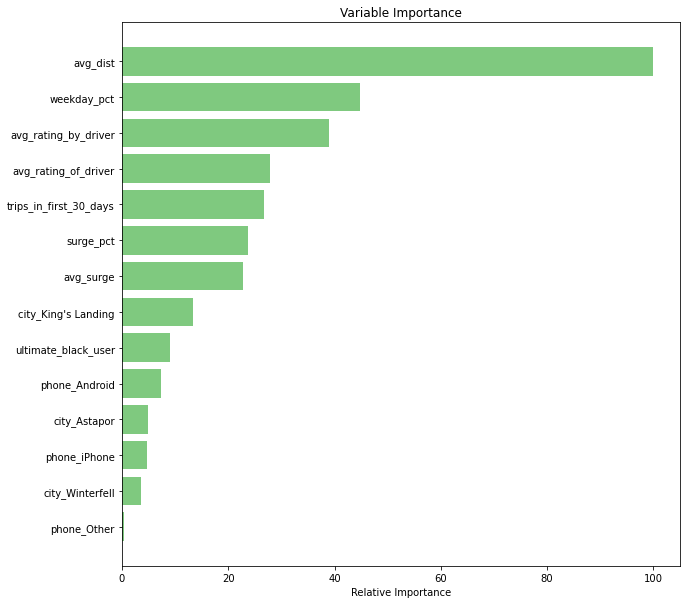

In [85]:
from sklearn import tree, metrics
clf = RandomForestClassifier(n_estimators=36)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)

ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))
#print('Random Forest: f1-score=%.3f' % (f1)) - same as accuracy score, above
print('Further Random Forest Metrics:')
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score:' , metrics.precision_score(y_test,y_pred))
print('Recall score:' , metrics.recall_score(y_test,y_pred))

feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())#[:48]
sorted_idx = np.argsort(feature_importance)#[:48]

pos = np.arange(sorted_idx.shape[0]) + .5
#print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [61]:
#It makes total sense that average distance and weekday_pct would be major indicators in whether a customer remains
#active into their sixth month. It's also interesting to note that King's Landing as their city is a major
#indicator. Still, this is not a very good model. 

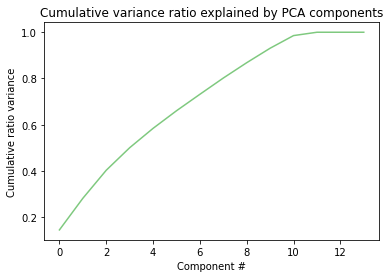

In [62]:
sns.set_palette("Accent")
data_pca = PCA().fit(X_train_scaled)
plt.plot(data_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components');

In [63]:
data_pca_x = data_pca.transform(X_train_scaled)
data_pca_x.shape

(40000, 14)

Text(0.5, 1.0, 'Ultimate Inc. User PCA, 28.1% variance explained')

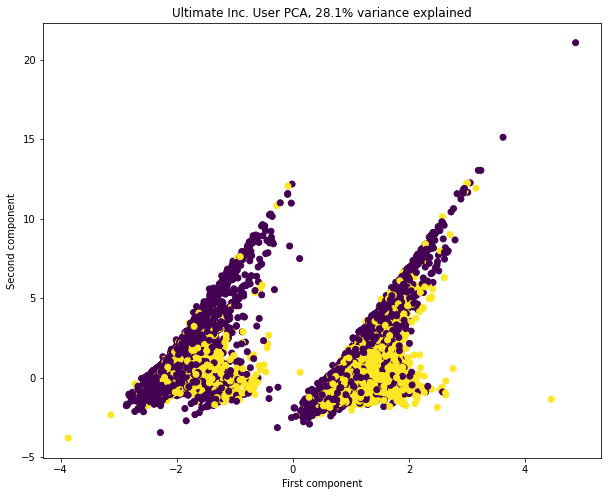

In [64]:
x = data_pca_x[:, 0]
y_pca = data_pca_x[:, 1]
pc_var = 100 * data_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y_pca, c=y_train)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Ultimate Inc. User PCA, {pc_var:.1f}% variance explained')
#for s, x, y in zip(X_index, x, y):
#    plt.annotate(s, (x, y))

### It's notable that this PCA only visualizes 28.1% of the variance. Also that it is deeply unhelpful.

In [65]:
#Gradient Boosting:
from sklearn.ensemble import GradientBoostingClassifier
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train_scaled, y_train)
   # print("Learning rate: ", learning_rate)
   # print("Accuracy score (training): {0:.3f}".format(gb.score(X_train_scaled, y_train)))
   # print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test_scaled, y_test)))
   # print()
    
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 1, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train_scaled, y_train)
y_pred = gb.predict(X_test_scaled)
print("Confusion matrix: ", confusion_matrix(y_test, y_pred))
print("Classification report: ", classification_report(y_test, y_pred))

y_scores_gb = gb.decision_function(X_test_scaled)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)
print("Area under ROC: ", roc_auc_gb)

Confusion matrix:  [[5546  881]
 [1410 2163]]
Classification report:                precision    recall  f1-score   support

           0       0.80      0.86      0.83      6427
           1       0.71      0.61      0.65      3573

    accuracy                           0.77     10000
   macro avg       0.75      0.73      0.74     10000
weighted avg       0.77      0.77      0.77     10000

Area under ROC:  0.8302763961389275


In [66]:
print("Gradient Boosting Model:")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred))
print('Recall score' , metrics.recall_score(y_test,y_pred))

Gradient Boosting Model:
Accuracy: 0.7709
Balanced accuracy: 0.7341478416059871
Precision score 0.7105781865965834
Recall score 0.6053736356003359


In [67]:
#Finally, a Baysian model:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import lightgbm
from bayes_opt import BayesianOptimization
from catboost import CatBoostClassifier, cv, Pool
import os
def lgb_eval(num_leaves,max_depth,lambda_l2,lambda_l1,min_child_samples, min_data_in_leaf):
    params = {
        "objective" : "binary",
        "metric" : "auc", 
        'is_unbalance': True,
        "num_leaves" : int(num_leaves),
        "max_depth" : int(max_depth),
        "lambda_l2" : lambda_l2,
        "lambda_l1" : lambda_l1,
        "num_threads" : 20,
        "min_child_samples" : int(min_child_samples),
        'min_data_in_leaf': int(min_data_in_leaf),
        "learning_rate" : 0.03,
        "subsample_freq" : 5,
        "bagging_seed" : 42,
        "verbosity" : -1
    }
    lgtrain = lightgbm.Dataset(X_train_scaled, y_train)
    cv_result = lightgbm.cv(params,
                       lgtrain,
                       1000,
                       early_stopping_rounds=100,
                       stratified=True,
                       nfold=3)
    return cv_result['auc-mean'][-1]

lgbBO = BayesianOptimization(lgb_eval, {'num_leaves': (25, 4000),
                                                'max_depth': (5, 63),
                                                'lambda_l2': (0.0, 0.05),
                                                'lambda_l1': (0.0, 0.05),
                                                'min_child_samples': (50, 10000),
                                                'min_data_in_leaf': (100, 2000)
                                                })

lgbBO.maximize(n_iter=10, init_points=2)

|   iter    |  target   | lambda_l1 | lambda_l2 | max_depth | min_ch... | min_da... | num_le... |
-------------------------------------------------------------------------------------------------
[LightGBM] [Warning] min_data_in_leaf is set=475, min_child_samples=2121 will be ignored. Current value: min_data_in_leaf=475
|  1        |  0.8441   |  0.03403  |  0.009779 |  62.62    |  2.122e+0 |  475.8    |  3.106e+0 |
|  2        |  0.8434   |  0.002178 |  0.003704 |  57.51    |  7.788e+0 |  1.331e+0 |  214.8    |
|  3        |  0.8434   |  0.04948  |  0.04609  |  31.76    |  5.849e+0 |  1.602e+0 |  3.074e+0 |
|  4        |  0.8438   |  0.004596 |  0.02634  |  49.66    |  5.794e+0 |  1.048e+0 |  355.8    |
|  5        |  0.8433   |  0.02028  |  0.01841  |  28.06    |  9.988e+0 |  1.52e+03 |  74.87    |
|  6        |  0.8445   |  0.02898  |  0.01265  |  7.75     |  2.144e+0 |  504.5    |  1.37e+03 |
|  7        |  0.8426   |  0.0434   |  0.04364  |  50.86    |  7.814e+0 |  1.979e+0 |  530

In [68]:
print(lgbBO.max)
params = lgbBO.max['params']

{'target': 0.8445330326685095, 'params': {'lambda_l1': 0.028982196353264635, 'lambda_l2': 0.012654765251389134, 'max_depth': 7.749777170130097, 'min_child_samples': 2144.4995402849763, 'min_data_in_leaf': 504.51857495216495, 'num_leaves': 1369.9717179776455}}


In [69]:
#Using these parameters to find more precise metrics for the lgb model:
train_data = lightgbm.Dataset(X_train_scaled, label=y_train)
test_data = lightgbm.Dataset(X_test_scaled, label=y_test)
params['num_leaves'] = int(params['num_leaves'])
params['max_depth'] = int(params['max_depth'])
params['min_data_in_leaf'] = int(params['min_data_in_leaf'])
params['application'] = 'binary'
params['objective'] = 'binary'
params['metric'] = 'auc'
params['is_unbalance'] = True
params['num_threads'] = 20
params['learning_rate'] = 0.03
params['subsample_freq'] = 5
params['bagging_seed'] = 42
params['verbosity'] = -1
#print(params)
model = lightgbm.train(params,
                       train_data,
                       valid_sets=test_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)
model.save_model('model.txt')
#Scroll all the way down to see the results.

[1]	valid_0's auc: 0.811122
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.811172
[3]	valid_0's auc: 0.812415
[4]	valid_0's auc: 0.81312
[5]	valid_0's auc: 0.814189
[6]	valid_0's auc: 0.814243
[7]	valid_0's auc: 0.814806
[8]	valid_0's auc: 0.815729
[9]	valid_0's auc: 0.8164
[10]	valid_0's auc: 0.816696
[11]	valid_0's auc: 0.816606
[12]	valid_0's auc: 0.817521
[13]	valid_0's auc: 0.817933
[14]	valid_0's auc: 0.818258
[15]	valid_0's auc: 0.819151
[16]	valid_0's auc: 0.819884
[17]	valid_0's auc: 0.820222
[18]	valid_0's auc: 0.820746
[19]	valid_0's auc: 0.821402
[20]	valid_0's auc: 0.821851
[21]	valid_0's auc: 0.822546
[22]	valid_0's auc: 0.823425
[23]	valid_0's auc: 0.824238
[24]	valid_0's auc: 0.824742
[25]	valid_0's auc: 0.825409
[26]	valid_0's auc: 0.825832
[27]	valid_0's auc: 0.826233
[28]	valid_0's auc: 0.826751
[29]	valid_0's auc: 0.827156
[30]	valid_0's auc: 0.827587
[31]	valid_0's auc: 0.827912
[32]	valid_0's auc: 0.828232
[33]	valid_0's auc: 0.

[277]	valid_0's auc: 0.842927
[278]	valid_0's auc: 0.842942
[279]	valid_0's auc: 0.842948
[280]	valid_0's auc: 0.84294
[281]	valid_0's auc: 0.842933
[282]	valid_0's auc: 0.842956
[283]	valid_0's auc: 0.842966
[284]	valid_0's auc: 0.842975
[285]	valid_0's auc: 0.842968
[286]	valid_0's auc: 0.842972
[287]	valid_0's auc: 0.842961
[288]	valid_0's auc: 0.842969
[289]	valid_0's auc: 0.842957
[290]	valid_0's auc: 0.843009
[291]	valid_0's auc: 0.843014
[292]	valid_0's auc: 0.843021
[293]	valid_0's auc: 0.843017
[294]	valid_0's auc: 0.843018
[295]	valid_0's auc: 0.843041
[296]	valid_0's auc: 0.843064
[297]	valid_0's auc: 0.843074
[298]	valid_0's auc: 0.843087
[299]	valid_0's auc: 0.843086
[300]	valid_0's auc: 0.843078
[301]	valid_0's auc: 0.843078
[302]	valid_0's auc: 0.843072
[303]	valid_0's auc: 0.843084
[304]	valid_0's auc: 0.843088
[305]	valid_0's auc: 0.843079
[306]	valid_0's auc: 0.843103
[307]	valid_0's auc: 0.843098
[308]	valid_0's auc: 0.84312
[309]	valid_0's auc: 0.843134
[310]	valid_

[563]	valid_0's auc: 0.844191
[564]	valid_0's auc: 0.844193
[565]	valid_0's auc: 0.844201
[566]	valid_0's auc: 0.844194
[567]	valid_0's auc: 0.84419
[568]	valid_0's auc: 0.844187
[569]	valid_0's auc: 0.844175
[570]	valid_0's auc: 0.844178
[571]	valid_0's auc: 0.844197
[572]	valid_0's auc: 0.8442
[573]	valid_0's auc: 0.844203
[574]	valid_0's auc: 0.844223
[575]	valid_0's auc: 0.844206
[576]	valid_0's auc: 0.844191
[577]	valid_0's auc: 0.844197
[578]	valid_0's auc: 0.844195
[579]	valid_0's auc: 0.844194
[580]	valid_0's auc: 0.844183
[581]	valid_0's auc: 0.84419
[582]	valid_0's auc: 0.844175
[583]	valid_0's auc: 0.844158
[584]	valid_0's auc: 0.844166
[585]	valid_0's auc: 0.844183
[586]	valid_0's auc: 0.844171
[587]	valid_0's auc: 0.844174
[588]	valid_0's auc: 0.844187
[589]	valid_0's auc: 0.844192
[590]	valid_0's auc: 0.844202
[591]	valid_0's auc: 0.844196
[592]	valid_0's auc: 0.844199
[593]	valid_0's auc: 0.844189
[594]	valid_0's auc: 0.844191
[595]	valid_0's auc: 0.844187
[596]	valid_0'

In [70]:
y_pred = model.predict(X_test_scaled, num_iteration=model.best_iteration)
y_pred = y_pred.round(0)

In [71]:
print("Light GBM with Bayesian Parameter Tuning:")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred))
print('Recall score' , metrics.recall_score(y_test,y_pred))

Light GBM with Bayesian Parameter Tuning:
Accuracy: 0.7681
Balanced accuracy: 0.7660852874960629
Precision score 0.6503597122302158
Recall score 0.7590260285474392


### Above, the Bayesian Parameter Tuning I used on the Light GBM model returned the best results. For the purposes of this exercise, I paid specific attention to the balanced accuracy score because I know the dataset is imbalanced (having fewer positively retained users than non-retained). If I were to re-do this exercise, I think I would re-sample my data to balance it and see if that improved the results. 

## 3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).
### I found it interesting that ultimate black membership does not rank very highly as a variable of importance. Looking back at my EDA, it looks like only about half of the ultimate black users were active when the study was performed. It could be that this program should be reconsidered or restructured if it's not actually encouraging retention of users. Meanwhile, the study does show that average distance and weekday percentages are major indicators of whether a person remains active, probably due to the needs of their working commutes. Users in King's Landing are also more likely to be retained.

In [72]:
not_retained = dummies_df[dummies_df['target'] == 0]
retained = dummies_df[dummies_df['target'] == 1]

<AxesSubplot:ylabel='Frequency'>

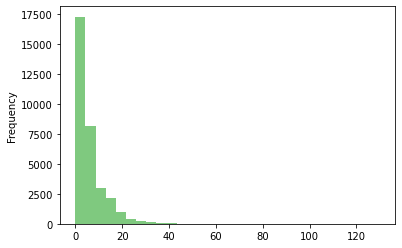

In [73]:
not_retained['avg_dist'].plot.hist(bins = 30)

<AxesSubplot:ylabel='Frequency'>

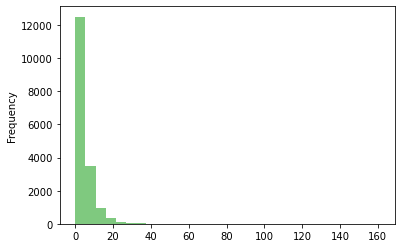

In [74]:
retained['avg_dist'].plot.hist(bins=30)

<AxesSubplot:xlabel='target', ylabel='avg_dist'>

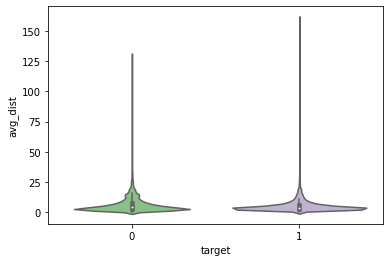

In [75]:
sns.violinplot(data=dummies_df, x='target',y='avg_dist')

<AxesSubplot:ylabel='Frequency'>

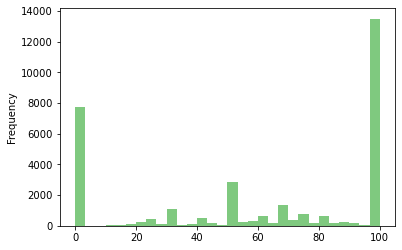

In [76]:
not_retained['weekday_pct'].plot.hist(bins = 30)

<AxesSubplot:ylabel='Frequency'>

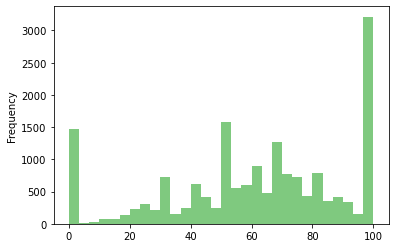

In [77]:
retained['weekday_pct'].plot.hist(bins = 30)

<AxesSubplot:xlabel='target', ylabel='weekday_pct'>

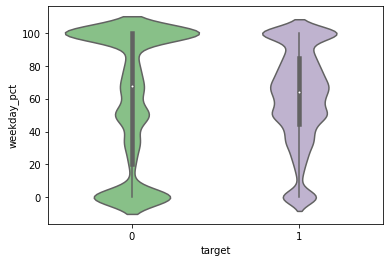

In [78]:
sns.violinplot(data=dummies_df, x='target',y='weekday_pct')

In [79]:
#For retained users, there is considerably more in the middle of the chart of percentages, while the unretained users
#tend to have all or nothing percentages. This makes me wonder if the difference being mapped is actually the rate of
#usage.

<AxesSubplot:ylabel='Frequency'>

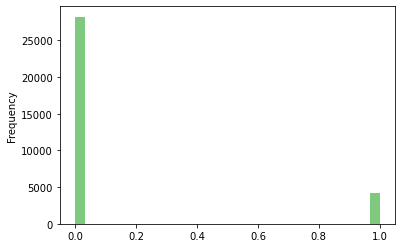

In [80]:
not_retained["city_King's Landing"].plot.hist(bins = 30)

<AxesSubplot:ylabel='Frequency'>

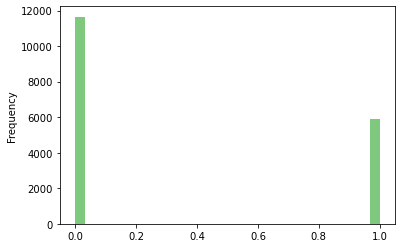

In [81]:
retained["city_King's Landing"].plot.hist(bins = 30)

<AxesSubplot:xlabel='target', ylabel="city_King's Landing">

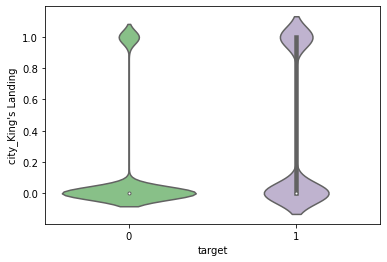

In [82]:
sns.violinplot(data=dummies_df, x='target',y="city_King's Landing")

In [83]:
#As I suspected, being in King's Landing makes a user more likely to be retained. 